In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as spt  
import numpy.fft as npt

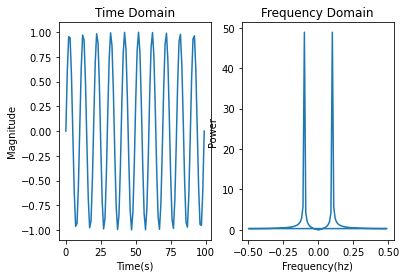

In [54]:
def F(dt,Y, xlimt='none', xlimf='none', plot='yes', output='no', absolute='yes',norm='no'):
    #f=np.size(t)/(np.amax(t)-np.amin(t))*spt.fftfreq(np.size(t))
    t=np.arange(0,np.size(Y)*dt,dt)
    f=spt.fftfreq(np.size(Y),d=dt)
    if absolute=='no':                   #plotting non-absolute is better for composition
        if norm=='yes':                  #found code online normalised this way so added it as an optional parameter
            A=(spt.fft(Y))/np.size(t)
        if norm=='no':
            A=(spt.fft(Y))
    if absolute=='yes': #plotting absolute makes graphs more readible
        if norm=='yes':
            A=abs(spt.fft(Y))/np.size(t)
        if norm=='no':
            A=abs(spt.fft(Y))
    
    if plot=='yes':          #plotting after each fourier transform can be turned off for composition
        plt.subplot(1,2,1)
        plt.plot(t,Y)
        plt.xlabel('Time(s)')
        if xlimt!='none':
            plt.xlim([-xlimt,xlimt])
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
        plt.subplot(1,2,2)
        plt.plot(f,A)
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    if output=='yes':
        return A

t0=np.linspace(0,10,100)  #several functions that have been tested
y0=np.sin(2*np.pi*t0)
    
t1=np.linspace(0,10,100)
y1=np.cos(2*np.pi*t1)
      
t2=np.linspace(0,10,100)
y2=np.zeros(100)
for i in range(48,52):
    y2[i]=1
    
t3=np.linspace(0,10,100)
y3=np.zeros(100)
y3[50]=1

t4=np.linspace(0,10,100)
y4=np.cos(2*np.pi*t0)+np.sin(4*np.pi*t0)

t5=np.linspace(0,10,100)
y5=np.cos(2*np.pi*t0)+5

plot1=F(1,y0) #change the inputs to transform each function (eg. try F(t2,y2))


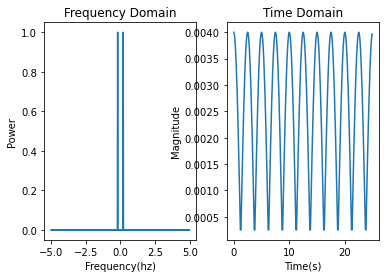

In [55]:
def invF(dt,A,xlimf='none',xlimt='none', plot='yes', output='no', absolute='yes',norm='no', positiveoutput='no'): #same as last cell but for inverse transform
    n=np.size(A)
    f=spt.fftfreq(np.size(A),d=dt)
    t=np.arange(0,np.size(A)*dt/2,dt)
    #print(f)
    #print(t)
    #print(A)
    if absolute=='no':
        if norm=='yes':
            Y0=(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=(spt.ifft(A))
    if absolute=='yes':
        if norm=='yes':    
            Y0=abs(spt.ifft(A))/np.size(f)
        if norm=='no':
            Y0=abs(spt.ifft(A))
    Y=[]
    for i in range(len(Y0)//2):      #only plots the positive part of the time domain since negative part does not have physical meaning
        Y.append(Y0[i])

    if plot=='yes':
        plt.subplot(1,2,1)
        plt.plot(f,A)
        if xlimf!='none':
            plt.xlim([-xlimf,xlimf])
        plt.xlabel('Frequency(hz)')
        plt.ylabel('Power')
        plt.title('Frequency Domain')
    
        plt.subplot(1,2,2)
        plt.plot(t,Y)
        if xlimt!='none':
            plt.xlim([0,xlimt])
        plt.xlabel('Time(s)')
        plt.ylabel('Magnitude')
        plt.title('Time Domain')
    
    if output=='yes':
        if positiveoutput=='yes':
            return Y
        else:
            return Y0              #negative part of time domain is necessary for further transformation
    
f0=np.linspace(0,10,1000)
#A0=np.sinc(0.5*np.pi*(f0))
A01=list(np.sinc(0.5*np.pi*(f0)))
A02=[]
for i in range(1,len(A01)+1):
    A02.append(A01[-i])
A0=A01+A02

f1=np.linspace(-5,5,1000)
A11=np.zeros(500)
A11[10]=1
A12=[]
for i in range(1,len(A11)+1):
    A12.append(-1*A11[-i+1])
A1=A11+A12
    
#A1[40]=-1
#A1[60]=1

f2=np.linspace(-5,5,1000)
A21=np.zeros(500)
A21[10]=1
A22=[]
for i in range(1,len(A21)+1):
    A22.append(A21[-i+1])
A2=A21+A22

f3=np.linspace(-5,5,100)
A3=np.ones(100)


invF(0.1,A2,xlimf='none',xlimt='none') #period is actually 5 but appears to be 2.5 since absolute value is plotted

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


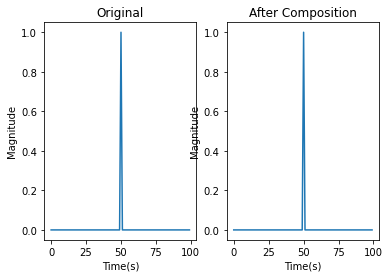

In [56]:
t0=np.linspace(0,10,100)
y0=np.zeros(100)
y0[50]=1

t1=np.linspace(0,10,100)
y1=np.cos(2*np.pi*t1)

t2=np.linspace(0,10,1000)
y2=np.zeros(1000)
for i in range(480,520):
    y2[i]=1

t3=np.linspace(-5,5,100)
y3=np.zeros(100)
y3[40]=1
y3[60]=1    

def compose(dt,y):    #composition inverse transform of transform. uses the real and imaginary parts of frequency space
    t=np.arange(0,np.size(y)*dt,dt)
    plt.subplot(1,2,1)
    plt.plot(t,y)
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.title('Original')
    y1=F(dt,y,plot='no',output='yes',absolute='no')
    y2=invF(dt,y1,plot='no',absolute='no', output='yes')
    plt.subplot(1,2,2)
    plt.plot(t,y2)
    plt.xlabel('Time(s)')
    plt.ylabel('Magnitude')
    plt.title('After Composition')

compose(1,y0)

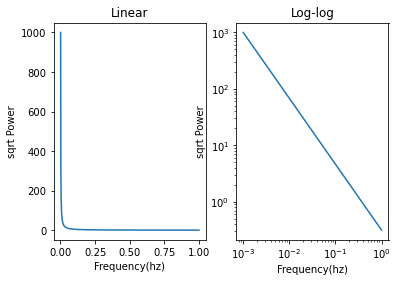

In [57]:
def P(f):  # model extracted from arXiv:1603.04461v1 figure 3
    return 0.1*f**(-7/3)
f=np.linspace(0.001,1,1000)
P0=P(f)
rP0=np.sqrt(P0)

plt.subplot(1,2,1)
plt.plot(f,rP0)
plt.title('Linear')
plt.xlabel('Frequency(hz)')
plt.ylabel('sqrt Power')

plt.subplot(1,2,2)
plt.loglog(f,rP0)
plt.title('Log-log')
plt.xlabel('Frequency(hz)')
plt.ylabel('sqrt Power')
plt.show()

1000 1000


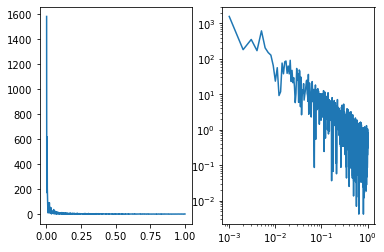

In [58]:
def noise(x,y,log=True,noisetype='white'):
    ywn=[]
    for i in y:
        ywn.append(i)
    if noisetype=='white':
        if log==False:
            noise=[]
            for i in range(len(x)):
                #print(x[i])
                b=-1
                while b<0:
                    noise0=(np.random.normal(0,1,1)) 
                    b=y[i]+noise0
                noise.append(noise0[0])  
        if log==True:
            noise=[]
            for i in range(len(x)):
                #print(x[i])
                b=-1
                while b<0:
                    noise0=(np.random.normal(0,y[i],1)) 
                    b=y[i]+noise0
                noise.append(noise0[0])
            #print(noise)
    for i in range(len(ywn)):
        ywn[i]+=noise[i]
    #print(y)
    return ywn
ywn=noise(f,rP0,log=True)
print(len(f),len(ywn))

plt.subplot(1,2,1)
plt.plot(f,ywn)
#plt.ylim(-10,10)

plt.subplot(1,2,2)
plt.loglog(f,ywn)

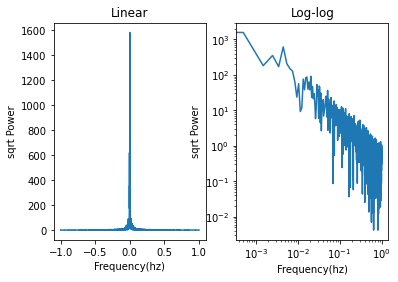

In [59]:
rP0=ywn
rP1=[]    #adding imaginary part of frequency domain to model
for i in range(len(rP0)):
    rP1.append(rP0[-i-1])
rP=np.concatenate([rP1,rP0]) #for visual representation
rPf=np.concatenate([rP0,rP1]) #for fft
f=np.linspace(-1,1,2000)

plt.subplot(1,2,1)
plt.plot(f,rP)
plt.title('Linear')
plt.xlabel('Frequency(hz)')
plt.ylabel('sqrt Power')

plt.subplot(1,2,2)
plt.loglog(f,rP)
plt.title('Log-log')
plt.xlabel('Frequency(hz)')
plt.ylabel('sqrt Power')
plt.show()

Text(0.5, 1.0, 'Log-log')

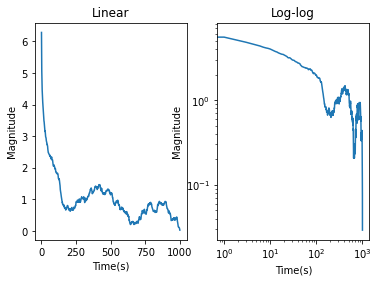

In [60]:
dt=1
y=invF(dt,rPf,output='yes',plot='no',positiveoutput='yes')  #inverse fourier transform applied to model
t=np.arange(0,np.size(rPf)*dt,dt)
t=np.arange(0,np.size(rPf)*dt/2,dt)
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.title('Linear')



plt.subplot(1,2,2)
plt.loglog(t,y)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.title('Log-log')